In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

In [2]:
import os
import json
import cv2
import torch
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from reaction.data import ImageData, get_bboxes_match
from reaction.evaluate import ReactionEvaluator

/data/rsg/nlp/yujieq/anaconda3/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [11]:
image_base = '../data/parse/images/'
data_base = '../data/parse/splits/'
pred_base = '../output/pix2seq_reaction_nov_cv_noise/'

## Predict SMILES

In [ ]:
from molscribe import MolScribe
from huggingface_hub import hf_hub_download

ckpt_path = hf_hub_download("yujieq/MolScribe", "swin_base_char_aux_1m.pth")

molscribe = MolScribe(ckpt_path, device=torch.device('cuda'))

In [12]:
for split in range(5):
    data_path = data_base + f'test{split}.json'
    pred_path = pred_base + f'{split}/prediction_test{split}.json'
    with open(data_path) as f:
        data = json.load(f)
    with open(pred_path) as f:
        predictions = json.load(f)
    new_predictions = []
    for idx, image_data in enumerate(tqdm(data['images'])):
        reactions = predictions['reaction'][idx]
        d = ImageData(image_data, reactions, load_image=True, image_path=image_base)
#         plt.imshow(d.image)
#         plt.show()
#         print(d.image.shape)
        bbox_images = []
        bbox_indices = []
        for i, reaction in enumerate(d.pred_reactions):
            for j, bbox in enumerate(reaction.bboxes):
                if bbox.is_mol:
                    bbox_images.append(bbox.image())
                    bbox_indices.append((i, j))
        if len(bbox_images) > 0:
            smiles_list, _ = molscribe.predict_images(bbox_images, batch_size=64)
            for (i, j), smiles in zip(bbox_indices, smiles_list):
                d.pred_reactions[i].bboxes[j].set_smiles(smiles)
        new_predictions.append([reaction.to_json() for reaction in d.pred_reactions])
    with open(pred_base + f'{split}/full_test{split}.json', 'w') as f:
        json.dump({'reaction': new_predictions}, f)

100%|██████████| 278/278 [10:04<00:00,  2.17s/it]


## Display prediction

0 66 ja3066978-Table-c1.png


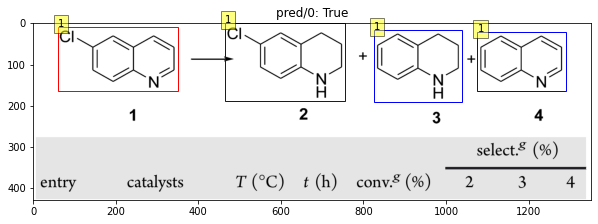

{'reactants': [{'category': '[Mol]', 'bbox': [0.04352176088044022, 0.018962087678910545, 0.25962981490745374, 0.3855624494711811], 'category_id': 1, 'smiles': 'Clc1ccc2ncccc2c1'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.34317158579289647, 0.0, 0.5592796398199099, 0.44086853853467023], 'category_id': 1, 'smiles': 'Clc1ccc2c(c1)CCCN2'}, {'category': '[Mol]', 'bbox': [0.6103051525762881, 0.039504349331063636, 0.7688844422211105, 0.44560906045439785], 'category_id': 1, 'smiles': 'c1ccc2c(c1)CCCN2'}, {'category': '[Mol]', 'bbox': [0.7958979489744873, 0.04740521919727637, 0.9544772386193097, 0.382402101524696], 'category_id': 1, 'smiles': 'c1ccc2ncccc2c1'}]}
1 511 ol051488h-Table-c1.png


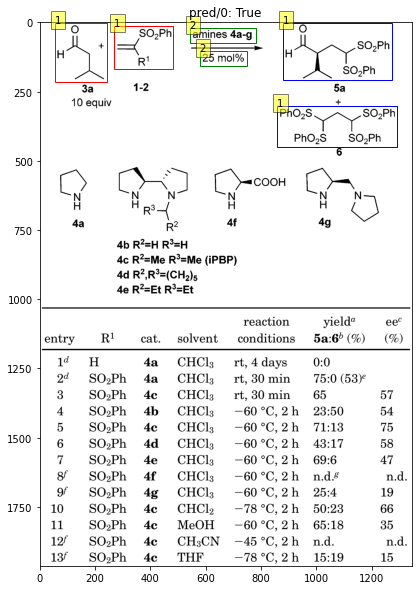

{'reactants': [{'category': '[Mol]', 'bbox': [0.04021473456026259, 0.0015007503751875938, 0.17986954003317449, 0.10955477738869435], 'category_id': 1, 'smiles': '[H]C(=O)CC(C)C'}, {'category': '[Mol]', 'bbox': [0.20034249580930816, 0.007503751875937969, 0.3582767260823394, 0.08504252126063032], 'category_id': 1, 'smiles': '[1*]C(=C)S(=O)(=O)c1ccccc1'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.40287852259463064, 0.009504752376188095, 0.5805545316517908, 0.03751875937968985], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.4299320712988073, 0.053526763381690844, 0.5564256909156333, 0.07953976988494248], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.6536722308522682, 0.0005002501250625312, 0.9468742046461828, 0.10655327663831916], 'category_id': 1, 'smiles': '[H]C(=O)[C@@H](CC(S(=O)=O)S(=O)=O)C(C)C'}, {'category': '[Mol]', 'bbox': [0.638317514020168, 0.15307653826913456, 0.9607665674942735, 0.22911455727863933], 'category_id': 1, 'smiles': 'O=[SH](=O)C(CC(c

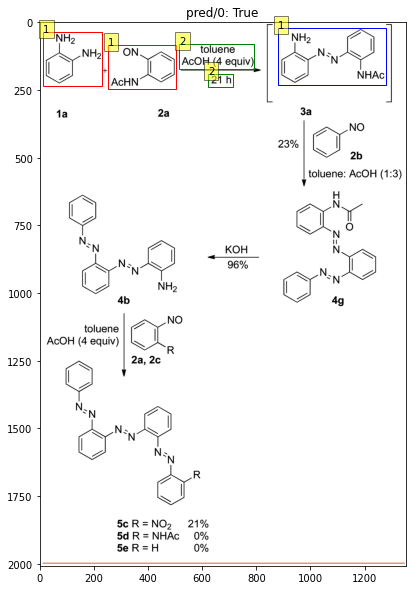

{'reactants': [{'category': '[Mol]', 'bbox': [0.00965349044232584, 0.017008504252126064, 0.17153509939825148, 0.11655827913956979], 'category_id': 1, 'smiles': 'Nc1ccccc1N'}, {'category': '[Mol]', 'bbox': [0.18564404696780462, 0.04202101050525263, 0.37351582249922294, 0.12256128064032017], 'category_id': 1, 'smiles': 'O=[N+]([O-])c1ccccc1[AcH]'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.38094158437793507, 0.03901950975487744, 0.5866351884182626, 0.08554277138569284], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.45965466029228425, 0.09504752376188094, 0.5294568219521788, 0.11855927963981991], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.6504967405751874, 0.009504752376188095, 0.9452994871600612, 0.11555777888944473], 'category_id': 1, 'smiles': 'CC(=O)Nc1ccccc1/N=N/c1ccccc1N'}]}


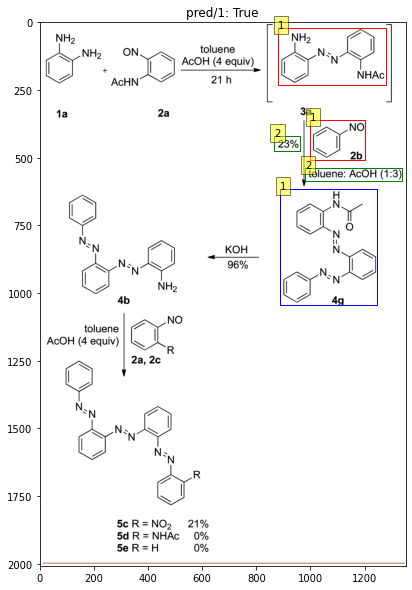

{'reactants': [{'category': '[Mol]', 'bbox': [0.6504967405751874, 0.009504752376188095, 0.9452994871600612, 0.11555777888944473], 'category_id': 1, 'smiles': 'CC(=O)Nc1ccccc1/N=N/c1ccccc1N'}, {'category': '[Mol]', 'bbox': [0.7381207307439911, 0.18009004502251125, 0.8888636968818486, 0.2531265632816408], 'category_id': 1, 'smiles': 'O=Nc1ccccc1'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.6408432501328616, 0.2096048024012006, 0.7099028356048849, 0.23711855927963982], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.7247543593623093, 0.2671335667833917, 0.9905966346202054, 0.29214607303651824], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.655694773890286, 0.3061530765382691, 0.9222796253360533, 0.51975987993997], 'category_id': 1, 'smiles': 'CC(=O)Nc1ccccc1/N=N/c1ccccc1/N=N/c1ccccc1'}]}


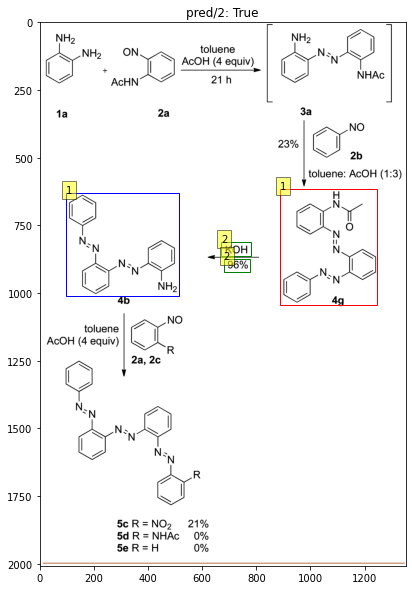

{'reactants': [{'category': '[Mol]', 'bbox': [0.655694773890286, 0.3061530765382691, 0.9222796253360533, 0.51975987993997], 'category_id': 1, 'smiles': 'CC(=O)Nc1ccccc1/N=N/c1ccccc1/N=N/c1ccccc1'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.4952983173101027, 0.4047023511755878, 0.5769816979759368, 0.42971485742871435], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.5027240791888149, 0.4352176088044022, 0.5740113932244518, 0.45872936468234116], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.07128731403563697, 0.3136568284142071, 0.38168416056580634, 0.503751875937969], 'category_id': 1, 'smiles': 'Nc1ccccc1/N=N/c1ccccc1/N=N/c1ccccc1'}]}


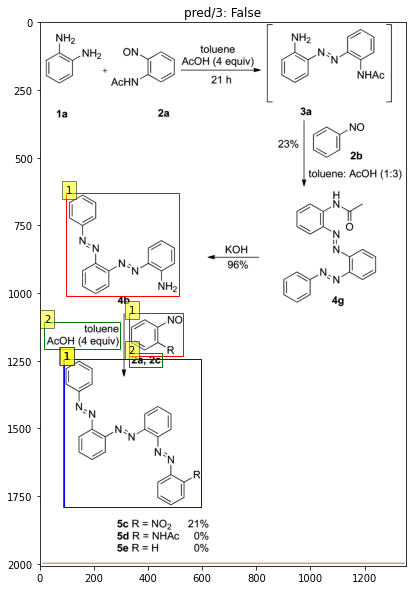

{'reactants': [{'category': '[Mol]', 'bbox': [0.07128731403563697, 0.3136568284142071, 0.38168416056580634, 0.503751875937969], 'category_id': 1, 'smiles': 'Nc1ccccc1/N=N/c1ccccc1/N=N/c1ccccc1'}, {'category': '[Mol]', 'bbox': [0.24282241343388844, 0.5352676338169085, 0.3920802271960034, 0.6133066533266633], 'category_id': 1, 'smiles': '*c1ccccc1N=O'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.011881219005939496, 0.551775887943972, 0.21905997542200945, 0.6003001500750376], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.24282241343388844, 0.6088044022011005, 0.3341592845420483, 0.6348174087043522], 'category_id': 2}, {'category': '[Mol]', 'bbox': [0.06460412834479601, 0.6188094047023511, 0.4410902555955038, 0.8919459729864933], 'category_id': 1, 'smiles': '*c1ccccc1/N=N/c1ccccc1/N=N/c1ccccc1/N=N/c1ccccc1'}], 'products': [{'category': '[Mol]', 'bbox': [0.06534670453266722, 0.6193096548274137, 0.4410902555955038, 0.8919459729864933], 'category_id': 1, 'smiles': '*c1ccccc1/N=N/c

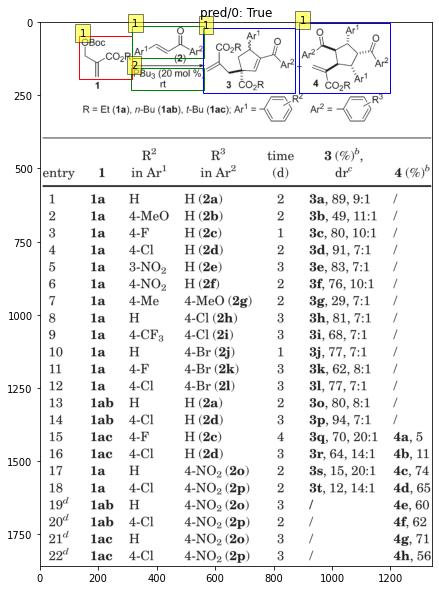

{'reactants': [{'category': '[Mol]', 'bbox': [0.1010983165518377, 0.026013006503251626, 0.23612689002860723, 0.1040520260130065], 'category_id': 1, 'smiles': '*OC(=O)C(=C)COC(=O)OC(C)(C)C'}], 'conditions': [{'category': '[Mol]', 'bbox': [0.23543443580564943, 0.006003001500750375, 0.41893480488946444, 0.06503251625812906], 'category_id': 1, 'smiles': '*C=CC(*)=O'}, {'category': '[Txt]', 'bbox': [0.2326646189138183, 0.08404202101050526, 0.4182423506665066, 0.12356178089044523], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.4154725337746755, 0.010505252626313157, 0.6509069695803249, 0.12906453226613307], 'category_id': 1, 'smiles': '*OC(=O)[C@@]1(CC(=C)C(=O)O)C=C(C(*)=O)C(*)C1'}, {'category': '[Mol]', 'bbox': [0.6612937829246919, 0.0015007503751875938, 0.8925734933925945, 0.1295647823911956], 'category_id': 1, 'smiles': '*OC(=O)C(=C)[C@H]1[C@@H](C(*)=O)[C@H](*)[C@H](C(*)=O)[C@@H]1*'}]}
4 913 acs.joc.5b00632-Scheme-c3.png


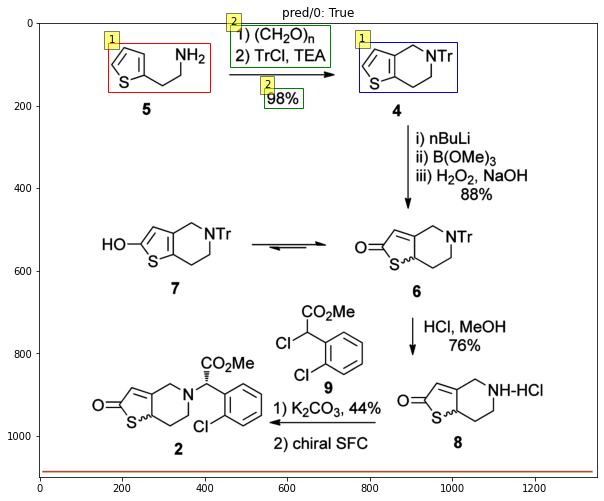

{'reactants': [{'category': '[Mol]', 'bbox': [0.12356178089044523, 0.044250696776959905, 0.3051525762881441, 0.15118988065461303], 'category_id': 1, 'smiles': 'NCCc1cccs1'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.34217108554277137, 0.003687558064746659, 0.5207603801900951, 0.09710569570499536], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.40220110055027514, 0.14258557850353748, 0.47223611805902954, 0.1868362752804974], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.5727863931965983, 0.04117773172300436, 0.7478739369684843, 0.15303365968698635], 'category_id': 1, 'smiles': '*1CCc2sccc2C1'}]}


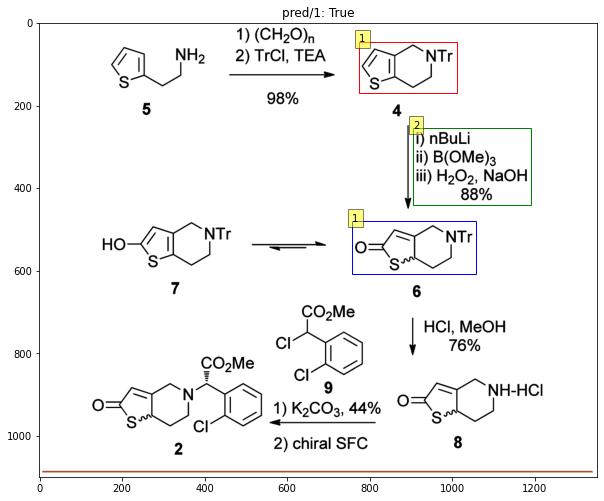

{'reactants': [{'category': '[Mol]', 'bbox': [0.5727863931965983, 0.04117773172300436, 0.7478739369684843, 0.15364825269777746], 'category_id': 1, 'smiles': '*1CCc2sccc2C1'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.6693346673336669, 0.2317015650682484, 0.8814407203601801, 0.4007146430358036], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.560280140070035, 0.43697563067247913, 0.7828914457228614, 0.5519045236904166], 'category_id': 1, 'smiles': 'O=C1C=C2C*CCC2S1'}]}


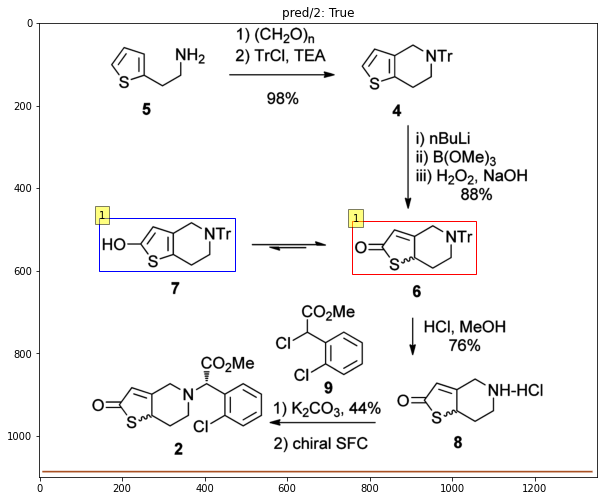

{'reactants': [{'category': '[Mol]', 'bbox': [0.5607803901950975, 0.43697563067247913, 0.7828914457228614, 0.5519045236904166], 'category_id': 1, 'smiles': 'O=C1C=C2C*CCC2S1'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.10655327663831916, 0.4302151075537769, 0.3506753376688344, 0.5457585935825056], 'category_id': 1, 'smiles': 'Oc1cc2c(s1)CC*C2'}]}


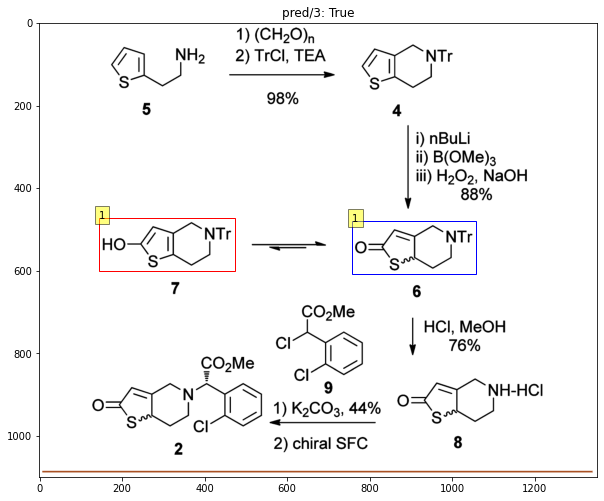

{'reactants': [{'category': '[Mol]', 'bbox': [0.10655327663831916, 0.4302151075537769, 0.3506753376688344, 0.5457585935825056], 'category_id': 1, 'smiles': 'Oc1cc2c(s1)CC*C2'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.560280140070035, 0.43697563067247913, 0.7828914457228614, 0.5519045236904166], 'category_id': 1, 'smiles': 'O=C1C=C2C*CCC2S1'}]}


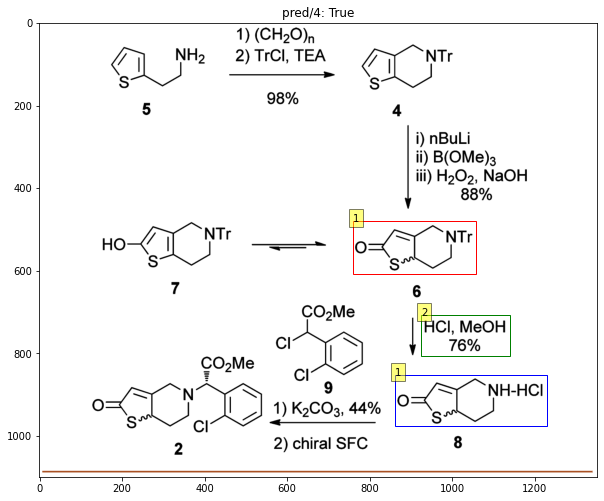

{'reactants': [{'category': '[Mol]', 'bbox': [0.5612806403201601, 0.43697563067247913, 0.7828914457228614, 0.5519045236904166], 'category_id': 1, 'smiles': 'O=C1C=C2C*CCC2S1'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.6833416708354177, 0.6440934753090831, 0.8424212106053026, 0.733209461873794], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.6368184092046023, 0.7762309726291717, 0.9099549774887443, 0.8880869005931538], 'category_id': 1, 'smiles': 'Cl.O=C1C=C2CN(Cl)CCC2S1'}]}


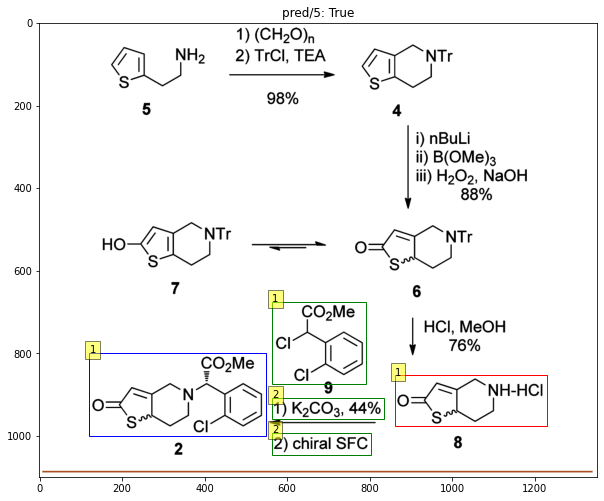

{'reactants': [{'category': '[Mol]', 'bbox': [0.6368184092046023, 0.7762309726291717, 0.9099549774887443, 0.8880869005931538], 'category_id': 1, 'smiles': 'Cl.O=C1C=C2CN(Cl)CCC2S1'}], 'conditions': [{'category': '[Mol]', 'bbox': [0.41720860430215106, 0.6145930107911098, 0.5857928964482241, 0.7940541699421139], 'category_id': 1, 'smiles': 'COC(=O)C(Cl)c1ccccc1Cl'}, {'category': '[Txt]', 'bbox': [0.41720860430215106, 0.8260130065032517, 0.6178089044522261, 0.872722075323376], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.416208104052026, 0.9022225398413493, 0.5942971485742872, 0.9520045737154291], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.0895447723861931, 0.7258343457443008, 0.40570285142571283, 0.9089830629600515], 'category_id': 1, 'smiles': 'COC(=O)[C@H](c1ccccc1Cl)N1CC[C@@H]2SC(=O)C=C2C1'}]}
5 1038 jo001700p-Scheme-c5.png


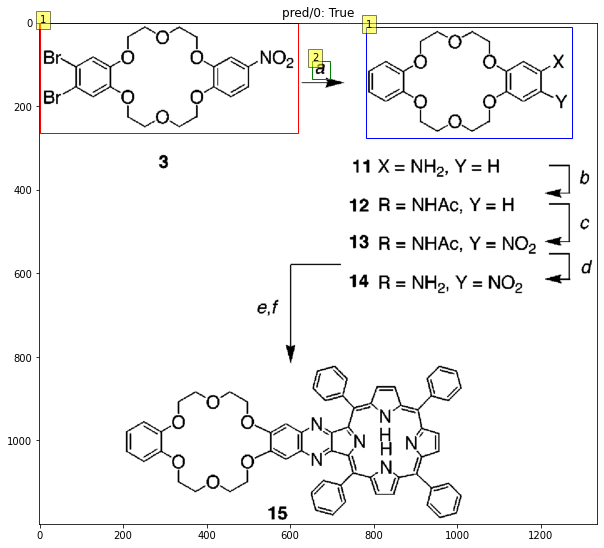

{'reactants': [{'category': '[Mol]', 'bbox': [0.0, 0.0, 0.46323161580790395, 0.22060654387344047], 'category_id': 1, 'smiles': 'O=[N+]([O-])c1ccc2c(c1)OCCOCCOc1cc(Br)c(Br)cc1OCCOCCO2'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.4882441220610305, 0.07520677632049107, 0.51975987993997, 0.11141744640072751], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.5842921460730365, 0.008356308480054564, 0.9544772386193097, 0.22896285235349506], 'category_id': 1, 'smiles': '*c1cc2c(cc1*)OCCOCCOc1ccccc1OCCOCCO2'}]}


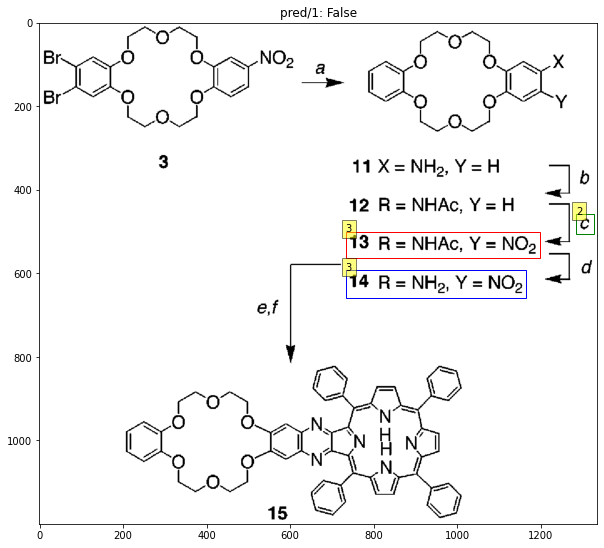

{'reactants': [{'category': '[Idt]', 'bbox': [0.5487743871935968, 0.4167012495387209, 0.896448224112056, 0.4690674493470628], 'category_id': 3}], 'conditions': [{'category': '[Txt]', 'bbox': [0.961480740370185, 0.3821618411544954, 0.9934967483741871, 0.4222721218587573], 'category_id': 2}], 'products': [{'category': '[Idt]', 'bbox': [0.5487743871935968, 0.4941363747872265, 0.8724362181090545, 0.5481738362915793], 'category_id': 3}]}


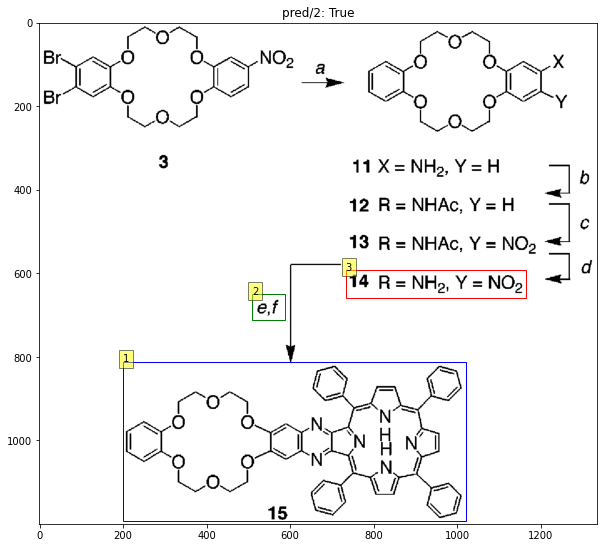

{'reactants': [{'category': '[Idt]', 'bbox': [0.5487743871935968, 0.4941363747872265, 0.8724362181090545, 0.5481738362915793], 'category_id': 3}], 'conditions': [{'category': '[Txt]', 'bbox': [0.3806903451725863, 0.5420458767395393, 0.43921960980490243, 0.593297902083874], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.14907453726863432, 0.676303899652416, 0.7648824412206103, 0.9949577963584967], 'category_id': 1, 'smiles': 'C1=CC=C(C2=C34C=CC5(=N3=C3C=56(C5=CC=CC=C5)C57=N89=C36%10=N53C856=C8%11%12=C39(=C539(=C85%13=CC=C8%14(=C%15=C(NC%113=C=5%15)C83C5=C(=C8(=CC=CC=C8)C%14=C38C=CC2=N8)C=CC=C5)N%13)C%122=C(=C93=CC=CC=C3)C=CC=C2)C62=NC3=C(C=C5OCCOCCOC6=CC=CC=C6OCCOCCOC5=C3)N=C27%10)N4)C=C1'}]}
6 1075 jo402763m-Scheme-c6.png


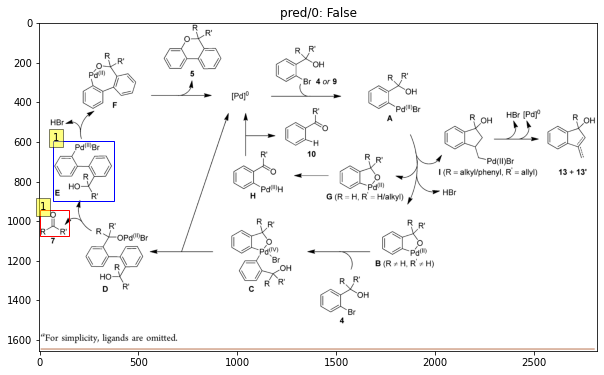

{'reactants': [{'category': '[Mol]', 'bbox': [0.0, 0.5697465591033065, 0.05252626313156578, 0.6506522737741796], 'category_id': 1, 'smiles': '*C(*)=O'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.0240120060030015, 0.360243340060835, 0.13356678339169584, 0.5424941078457491], 'category_id': 1, 'smiles': '*c1ccccc1-c1ccccc1C(*)(*)O'}]}


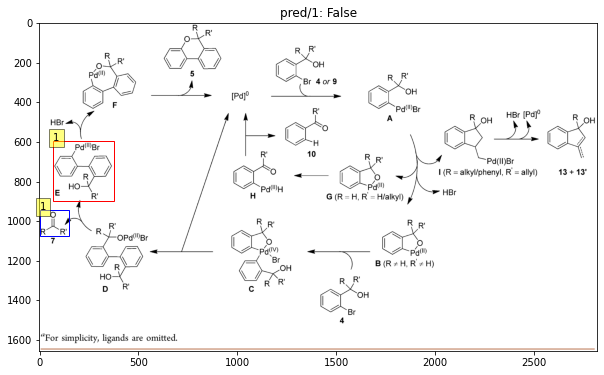

{'reactants': [{'category': '[Mol]', 'bbox': [0.02451225612806403, 0.360243340060835, 0.13356678339169584, 0.5424941078457491], 'category_id': 1, 'smiles': '*c1ccccc1-c1ccccc1C(*)(*)O'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.0, 0.5697465591033065, 0.05252626313156578, 0.6506522737741796], 'category_id': 1, 'smiles': '*C(*)=O'}]}


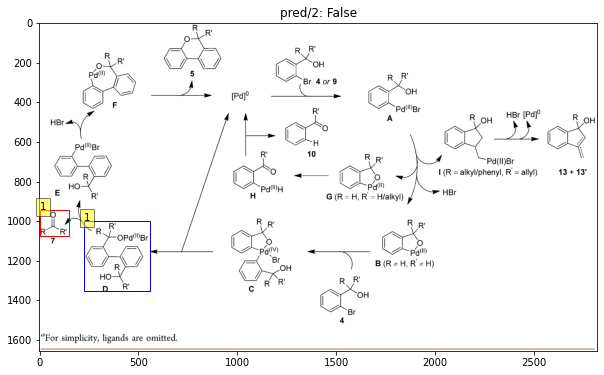

{'reactants': [{'category': '[Mol]', 'bbox': [0.0, 0.5697465591033065, 0.05252626313156578, 0.6506522737741796], 'category_id': 1, 'smiles': '*C(*)=O'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.07953976988494248, 0.6021088449716557, 0.19859929964982492, 0.8184251768285165], 'category_id': 1, 'smiles': '*C(*)(*)c1ccccc1-c1ccccc1C(*)(*)O.[2H]'}]}


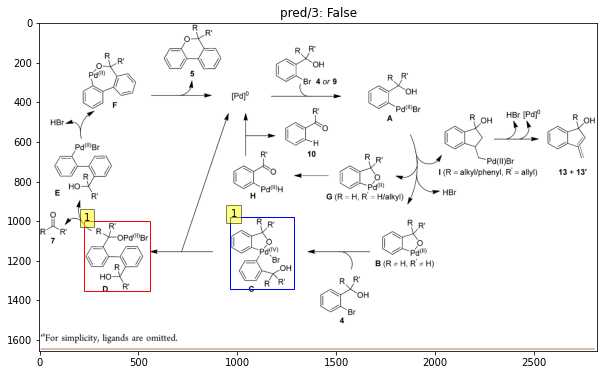

{'reactants': [{'category': '[Mol]', 'bbox': [0.07903951975987994, 0.6021088449716557, 0.19859929964982492, 0.8184251768285165], 'category_id': 1, 'smiles': '*C(*)(*)c1ccccc1-c1ccccc1C(*)(*)O.[2H]'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.34217108554277137, 0.5901858975464744, 0.45672836418209106, 0.8107604249123285], 'category_id': 1, 'smiles': '*C(*)(O)c1ccccc1[Pd]1([PdH2](Br)Br)OC(*)(*)c2ccccc21'}]}


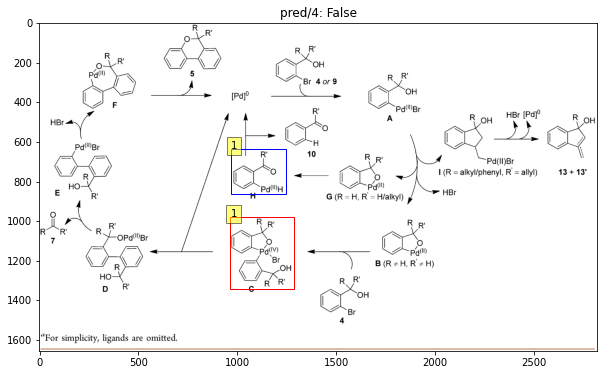

{'reactants': [{'category': '[Mol]', 'bbox': [0.34217108554277137, 0.5901858975464744, 0.45672836418209106, 0.8107604249123285], 'category_id': 1, 'smiles': '*C(*)(O)c1ccccc1[Pd]1([PdH2](Br)Br)OC(*)(*)c2ccccc21'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.34317158579289647, 0.3840892349111976, 0.4412206103051526, 0.5220547694025812], 'category_id': 1, 'smiles': '*C(=O)c1ccccc1[PdH].I'}]}


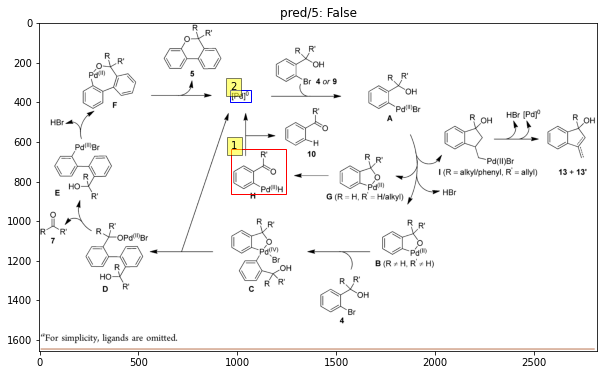

{'reactants': [{'category': '[Mol]', 'bbox': [0.34367183591795897, 0.3840892349111976, 0.4412206103051526, 0.5220547694025812], 'category_id': 1, 'smiles': '*C(=O)c1ccccc1[PdH].I'}], 'conditions': [], 'products': [{'category': '[Txt]', 'bbox': [0.34217108554277137, 0.20439338443167945, 0.3796898449224612, 0.24186550491082068], 'category_id': 2}]}


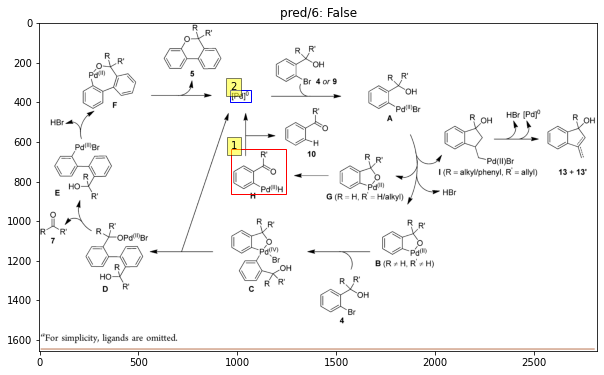

{'reactants': [{'category': '[Mol]', 'bbox': [0.34317158579289647, 0.3849408740129963, 0.4412206103051526, 0.5220547694025812], 'category_id': 1, 'smiles': '*C(=O)c1ccccc1[PdH].I'}], 'conditions': [], 'products': [{'category': '[Txt]', 'bbox': [0.34217108554277137, 0.20439338443167945, 0.3791895947973987, 0.24186550491082068], 'category_id': 2}]}


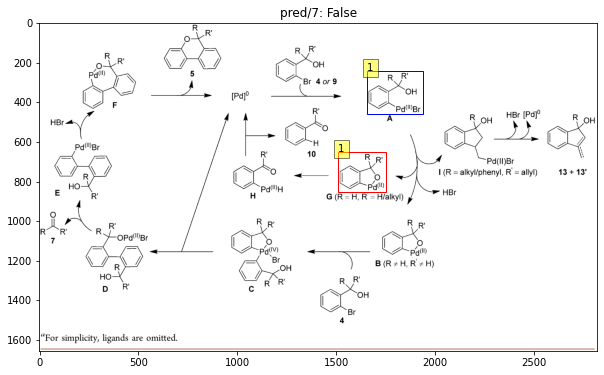

{'reactants': [{'category': '[Mol]', 'bbox': [0.5352676338169085, 0.39260562592918424, 0.6213106553276638, 0.5143900174863932], 'category_id': 1, 'smiles': '*C1(*)O[Pd]c2ccccc21'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.5872936468234117, 0.14563028640757159, 0.6873436718359179, 0.27848598628816323], 'category_id': 1, 'smiles': '*C(*)(O)c1ccccc1[PdH]'}]}


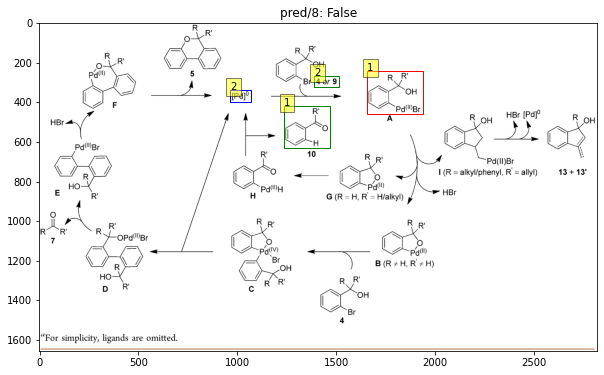

{'reactants': [{'category': '[Mol]', 'bbox': [0.5872936468234117, 0.14563028640757159, 0.6873436718359179, 0.27848598628816323], 'category_id': 1, 'smiles': '*C(*)(O)c1ccccc1[PdH]'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.49224612306153076, 0.16181142934174622, 0.5372686343171585, 0.19417371521009547], 'category_id': 2}, {'category': '[Mol]', 'bbox': [0.4382191095547774, 0.2529368132342033, 0.5207603801900951, 0.380682678504003], 'category_id': 1, 'smiles': '*C(=O)c1ccccc1[H]'}], 'products': [{'category': '[Txt]', 'bbox': [0.34217108554277137, 0.20439338443167945, 0.3791895947973987, 0.24186550491082068], 'category_id': 2}]}


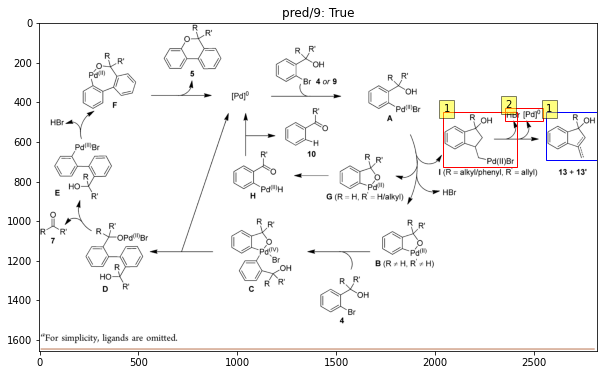

{'reactants': [{'category': '[Mol]', 'bbox': [0.7238619309654828, 0.27167287347377395, 0.8554277138569285, 0.43859413742631215], 'category_id': 1, 'smiles': '*.*CC1CC(*)(O)c2ccccc21.CCC'}, {'category': '[Txt]', 'bbox': [0.8349174587293647, 0.25889828694679395, 0.9019509754877438, 0.2972220465277339], 'category_id': 2}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.9079539769884942, 0.27167287347377395, 1.0, 0.41730315988134553], 'category_id': 1, 'smiles': '<invalid>'}]}


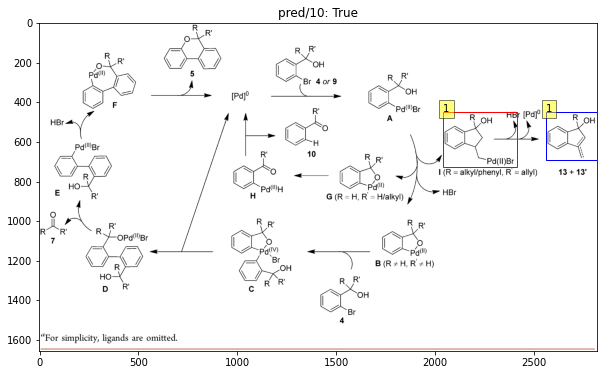

{'reactants': [{'category': '[Mol]', 'bbox': [0.7233616808404202, 0.27167287347377395, 0.8554277138569285, 0.43859413742631215], 'category_id': 1, 'smiles': '*.*CC1CC(*)(O)c2ccccc21.CCC'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.9074537268634317, 0.27167287347377395, 1.0, 0.41730315988134553], 'category_id': 1, 'smiles': '<invalid>'}]}


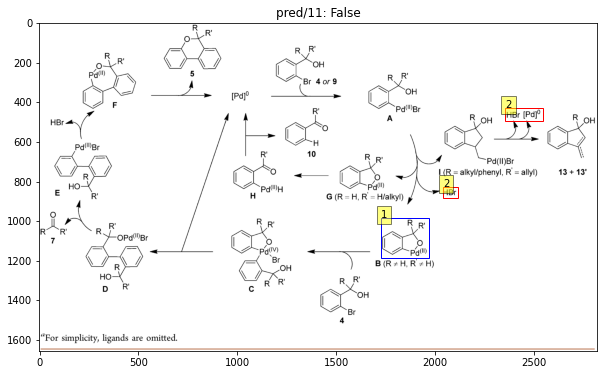

{'reactants': [{'category': '[Txt]', 'bbox': [0.8344172086043021, 0.25889828694679395, 0.9019509754877438, 0.2972220465277339], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.7228614307153577, 0.49991215275581596, 0.7503751875937968, 0.5322744386241652], 'category_id': 2}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.6118059029514757, 0.5935924539536691, 0.6983491745872936, 0.7153768455108781], 'category_id': 1, 'smiles': '*C1(*)O[Pd]c2ccccc21'}]}


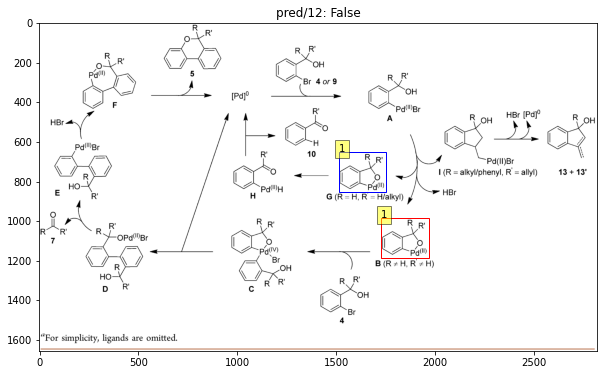

{'reactants': [{'category': '[Mol]', 'bbox': [0.6118059029514757, 0.5935924539536691, 0.6983491745872936, 0.7153768455108781], 'category_id': 1, 'smiles': '*C1(*)O[Pd]c2ccccc21'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.5362681340670336, 0.39260562592918424, 0.6213106553276638, 0.5143900174863932], 'category_id': 1, 'smiles': '*C1(*)O[Pd]c2ccccc21'}]}
7 1326 op400113a-Scheme-c3.png


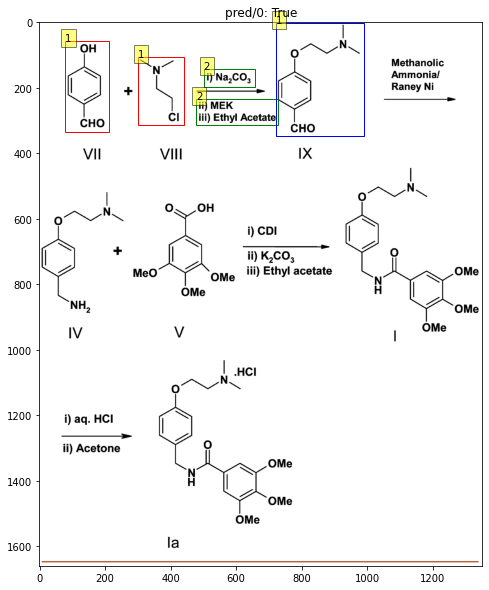

{'reactants': [{'category': '[Mol]', 'bbox': [0.057718546197592355, 0.0335167583791896, 0.15596288015094104, 0.20110055027513757], 'category_id': 1, 'smiles': 'Oc1ccc(O)cc1'}, {'category': '[Mol]', 'bbox': [0.2222778055694514, 0.06303151575787894, 0.3254343562204675, 0.18959479739869936], 'category_id': 1, 'smiles': 'CN(C)CCCl'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.37025833358668286, 0.08554277138569284, 0.48630945306907597, 0.11855927963981991], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.3530655751448469, 0.14007003501750875, 0.5391157825690008, 0.18959479739869936], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.5329755116969166, 0.0005002501250625312, 0.7319202879524477, 0.2096048024012006], 'category_id': 1, 'smiles': 'CN(C)CCOc1ccc(C=O)cc1'}]}


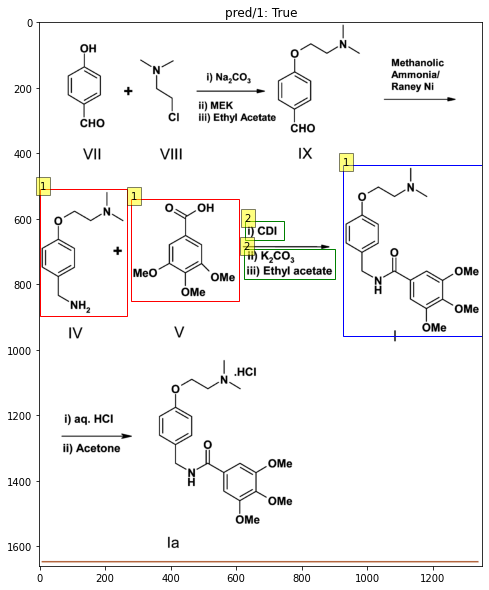

{'reactants': [{'category': '[Mol]', 'bbox': [0.0, 0.30665332666333167, 0.19771672208111424, 0.5392696348174087], 'category_id': 1, 'smiles': 'CN(C)CCOc1ccc(CN)cc1'}, {'category': '[Mol]', 'bbox': [0.20631310130203226, 0.3246623311655828, 0.44946782783657024, 0.5117558779389695], 'category_id': 1, 'smiles': 'COc1cc(C(=O)O)cc(OC)c1OC'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.4629764237551557, 0.3661830915457729, 0.5520103514003779, 0.4012006003001501], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.46052031540632193, 0.416208104052026, 0.668061470882771, 0.47273636818409204], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.6846402022373985, 0.26313156578289143, 1.0008641521497397, 0.5767883941970986], 'category_id': 1, 'smiles': 'COc1cc(C(=O)NCc2ccc(OCCN(C)C)cc2)cc(OC)c1OC'}]}


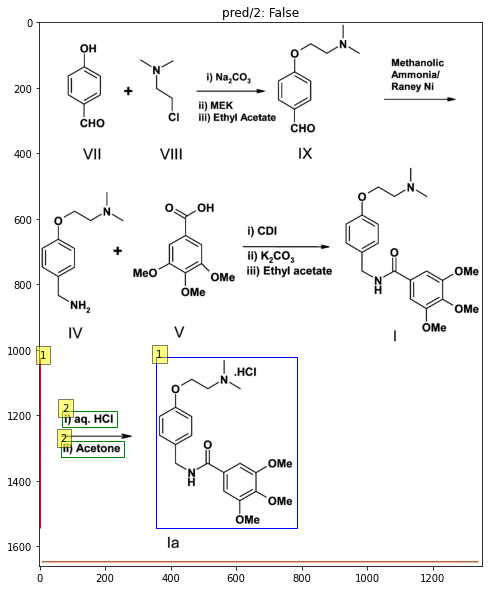

{'reactants': [{'category': '[Mol]', 'bbox': [0.0, 0.6173086543271635, 0.0018420812616252878, 0.9304652326163082], 'category_id': 1, 'smiles': '[16H]123C45C16C24C356'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.051578275325508065, 0.7148574287143572, 0.17561174694161077, 0.7443721860930466], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.047280085715049054, 0.7698849424712356, 0.18973436994740464, 0.80040020010005], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.2634176204124162, 0.6163081540770385, 0.5802555974119656, 0.9304652326163082], 'category_id': 1, 'smiles': 'COC1=CC(C(=O)NCC2=CC=C(OCCN(C)(C)C)C=C2)=CC(OC)=C1OC'}]}
8 1118 jo990528q-Scheme-c2.png


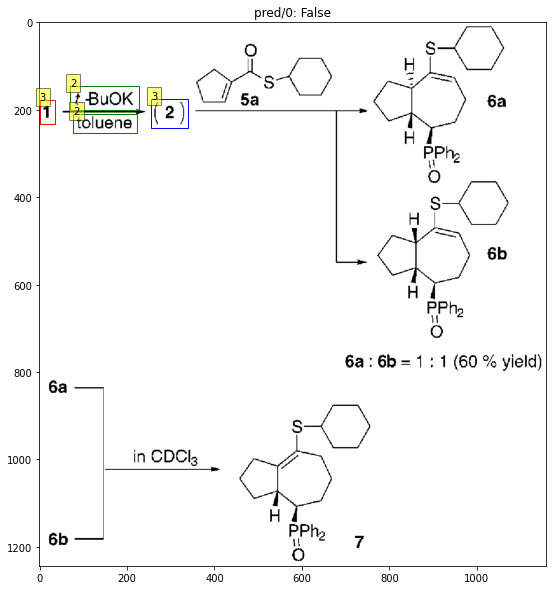

{'reactants': [{'category': '[Idt]', 'bbox': [0.0, 0.14307153576788395, 0.03111531630658451, 0.1870935467733867], 'category_id': 3}], 'conditions': [{'category': '[Txt]', 'bbox': [0.05954827775915311, 0.11755877938969485, 0.19527543337235795, 0.16058029014507252], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.06652240037959446, 0.16858429214607304, 0.19205660754753887, 0.20260130065032517], 'category_id': 2}], 'products': [{'category': '[Idt]', 'bbox': [0.2194166270585011, 0.14007003501750875, 0.2929131500585369, 0.19409704852426213], 'category_id': 3}]}


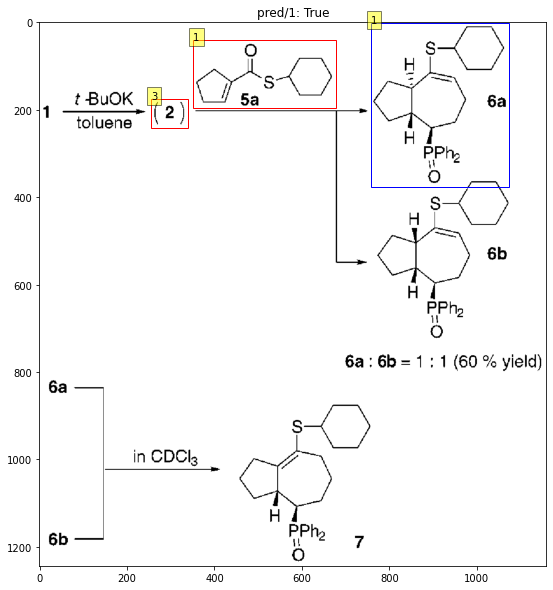

{'reactants': [{'category': '[Idt]', 'bbox': [0.2194166270585011, 0.14007003501750875, 0.29344962102934014, 0.19409704852426213], 'category_id': 3}, {'category': '[Mol]', 'bbox': [0.3031060985037973, 0.03301650825412707, 0.5842168872046642, 0.15757878939469736], 'category_id': 1, 'smiles': 'O=C(SC1CCCCC1)C1=CCCC1'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.6528851714674715, 0.0015007503751875938, 0.9254124246354875, 0.3026513256628314], 'category_id': 1, 'smiles': '[H][C@@]12CCC[C@@]1([H])[C@H](P(=O)(c1ccccc1)c1ccccc1)CCC=C2SC1CCCCC1'}]}


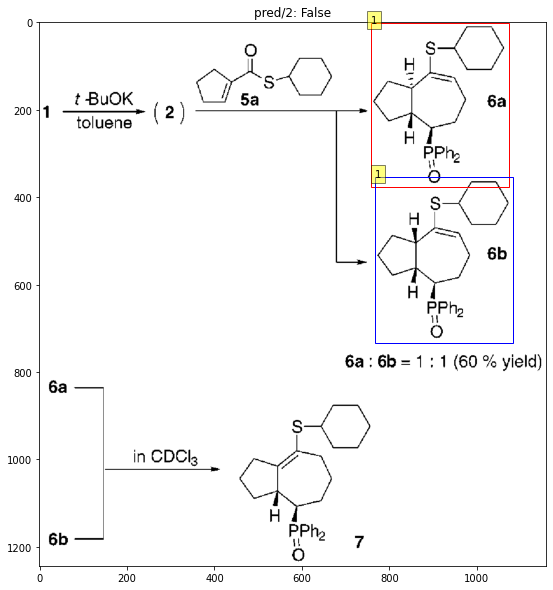

{'reactants': [{'category': '[Mol]', 'bbox': [0.6528851714674715, 0.0015007503751875938, 0.9254124246354875, 0.3021510755377689], 'category_id': 1, 'smiles': '[H][C@@]12CCC[C@@]1([H])[C@H](P(=O)(c1ccccc1)c1ccccc1)CCC=C2SC1CCCCC1'}], 'conditions': [], 'products': [{'category': '[Mol]', 'bbox': [0.6609322360295192, 0.2846423211605803, 0.9329230182267321, 0.5892946473236619], 'category_id': 1, 'smiles': '[H][C@]12CCC[C@@]1([H])[C@H](P(=O)(c1ccccc1)c1ccccc1)CCC=C2SC1CCCCC1'}]}


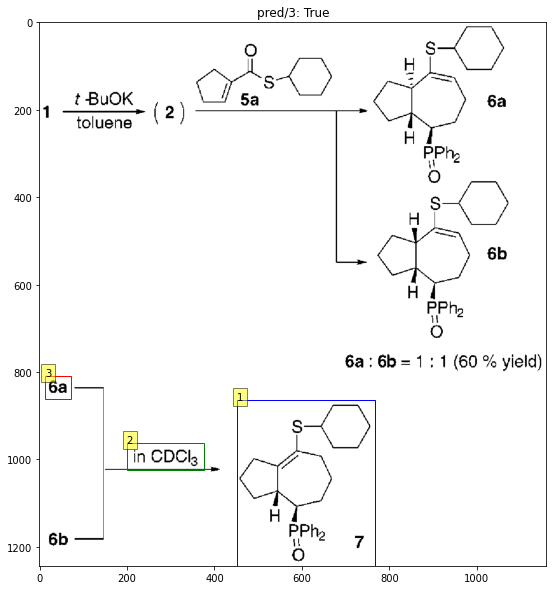

{'reactants': [{'category': '[Idt]', 'bbox': [0.010192948445260443, 0.6508254127063532, 0.06169416164236583, 0.6928464232116058], 'category_id': 3}], 'conditions': [{'category': '[Txt]', 'bbox': [0.17167071065701797, 0.7733866933466733, 0.3240284663651214, 0.8234117058529264], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.3889414538323064, 0.6953476738369184, 0.6620051779711255, 1.0], 'category_id': 1, 'smiles': '[H][C@@]12CCCC1=C(SC1CCCCC1)CCC[C@H]2P(=O)(c1ccccc1)c1ccccc1'}]}
9 153 op700160a-Table-c4.png


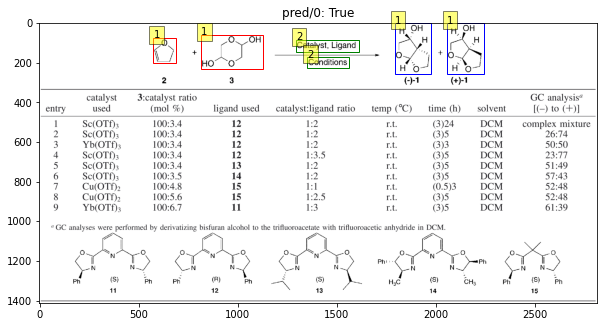

{'reactants': [{'category': '[Mol]', 'bbox': [0.20410205102551277, 0.053905695362651385, 0.24412206103051526, 0.14374852096707036], 'category_id': 1, 'smiles': 'C1=COCC1'}, {'category': '[Mol]', 'bbox': [0.2896448224112056, 0.04192665194872886, 0.3996998499249625, 0.1637135933236079], 'category_id': 1, 'smiles': 'OC1COC(O)CO1'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.45972986493246626, 0.059895217069612657, 0.5722861430715358, 0.10182186901834152], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.4797398699349675, 0.12278519499270593, 0.5547773886943472, 0.1597205788523004], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.6368184092046023, 0.0009982536178268775, 0.7018509254627313, 0.18068390482666483], 'category_id': 1, 'smiles': '[H][C@@]12CCO[C@]1([H])OC[C@]2([H])O'}, {'category': '[Mol]', 'bbox': [0.7293646823411706, 0.0009982536178268775, 0.7963981990995498, 0.18068390482666483], 'category_id': 1, 'smiles': '[H][C@@]1(O)CO[C@]2([H])OCC[C@]12[H]'}]}
1

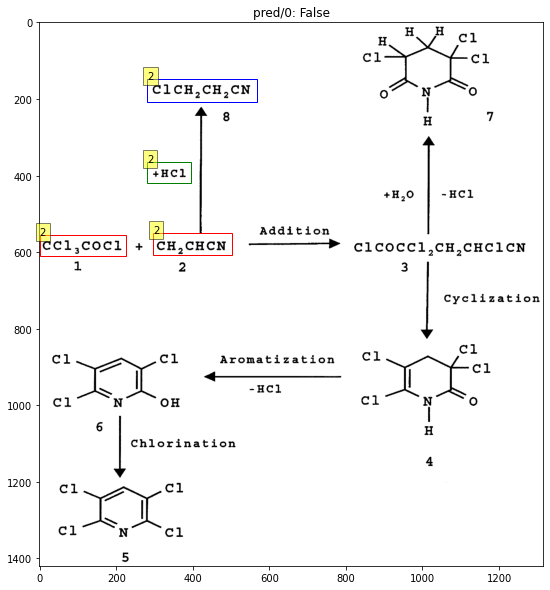

{'reactants': [{'category': '[Txt]', 'bbox': [0.0, 0.39119559779889945, 0.17224280156272467, 0.42971485742871435], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.22515751803027018, 0.38819409704852426, 0.3817418830872926, 0.4272136068034017], 'category_id': 2}], 'conditions': [{'category': '[Txt]', 'bbox': [0.2127387580429891, 0.256128064032016, 0.3012899162131673, 0.29514757378689344], 'category_id': 2}], 'products': [{'category': '[Txt]', 'bbox': [0.21381865021579613, 0.10505252626313157, 0.431416923036417, 0.1470735367683842], 'category_id': 2}]}


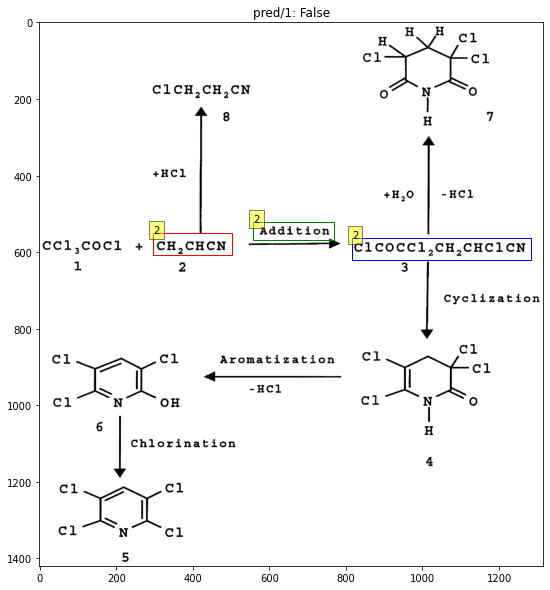

{'reactants': [{'category': '[Txt]', 'bbox': [0.2256974641166737, 0.38819409704852426, 0.3817418830872926, 0.4272136068034017], 'category_id': 2}], 'conditions': [{'category': '[Txt]', 'bbox': [0.4243976239131712, 0.36718359179589793, 0.5842216654886148, 0.4012006003001501], 'category_id': 2}], 'products': [{'category': '[Txt]', 'bbox': [0.6198581071912475, 0.39619809904952474, 0.9756825781311709, 0.43721860930465234], 'category_id': 2}]}


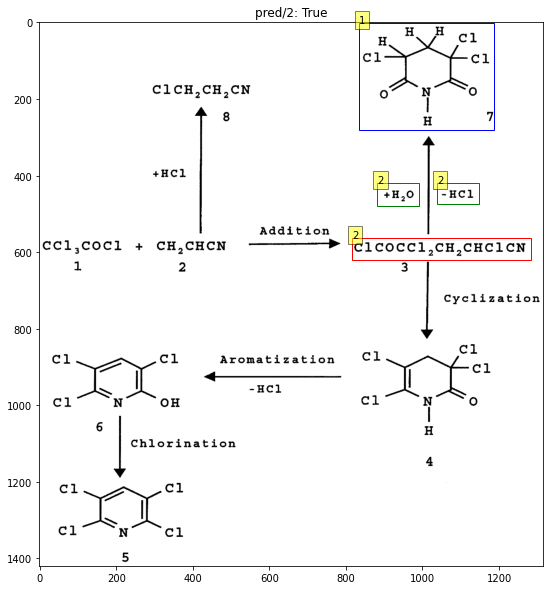

{'reactants': [{'category': '[Txt]', 'bbox': [0.6198581071912475, 0.39619809904952474, 0.9751426320447673, 0.43721860930465234], 'category_id': 2}], 'conditions': [{'category': '[Txt]', 'bbox': [0.6706130393131788, 0.295647823911956, 0.7532247905329182, 0.3386693346673337], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.7888612322355509, 0.295647823911956, 0.8720129295416938, 0.33466733366683343], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.633896705437739, 0.0015007503751875938, 0.9027898564666949, 0.19859929964982492], 'category_id': 1, 'smiles': '*N1C(=O)C([H])(Cl)C([H])([H])C(Cl)(Cl)C1=O'}]}


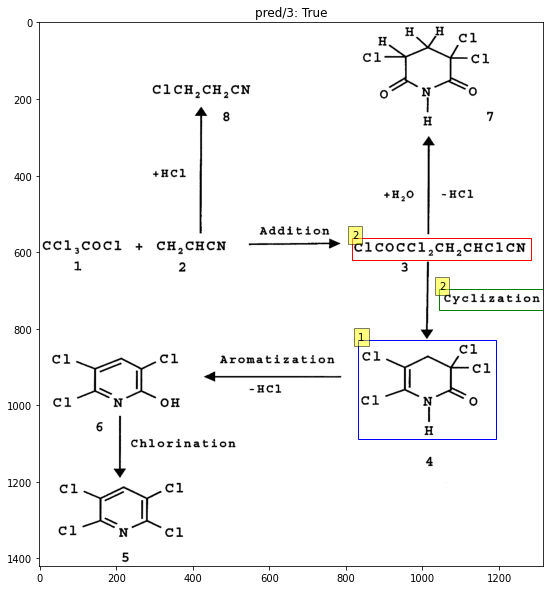

{'reactants': [{'category': '[Txt]', 'bbox': [0.6198581071912475, 0.39619809904952474, 0.9751426320447673, 0.43721860930465234], 'category_id': 2}], 'conditions': [{'category': '[Txt]', 'bbox': [0.7926408548403756, 0.49074537268634316, 1.00159999027854, 0.5292646323161581], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.6322768671785285, 0.5847923961980991, 0.906029532985116, 0.7658829414707353], 'category_id': 1, 'smiles': 'CN1C(=O)C(Cl)(Cl)CC(Cl)=C1Cl'}]}


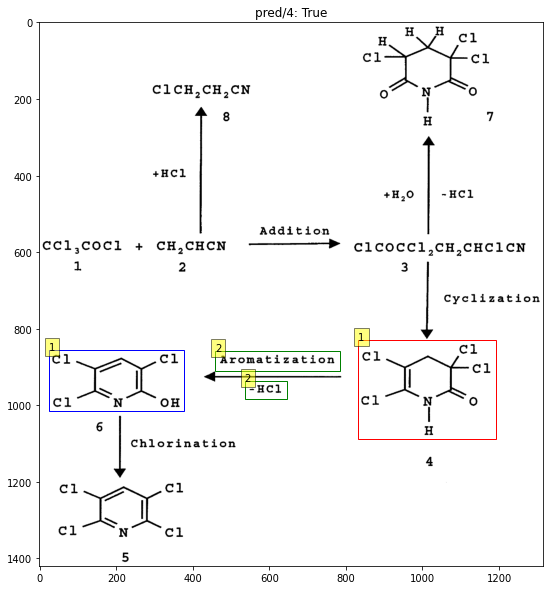

{'reactants': [{'category': '[Mol]', 'bbox': [0.6322768671785285, 0.5847923961980991, 0.906029532985116, 0.7658829414707353], 'category_id': 1, 'smiles': 'CN1C(=O)C(Cl)(Cl)CC(Cl)=C1Cl'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.348265225730274, 0.6048024012006002, 0.5955605333030888, 0.6408204102051025], 'category_id': 2}, {'category': '[Txt]', 'bbox': [0.4071193491482583, 0.6588294147073537, 0.4908109925408048, 0.6928464232116058], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.018358166937719873, 0.6018009004502252, 0.2861714257938686, 0.7148574287143572], 'category_id': 1, 'smiles': 'Oc1nc(Cl)c(Cl)cc1Cl'}]}


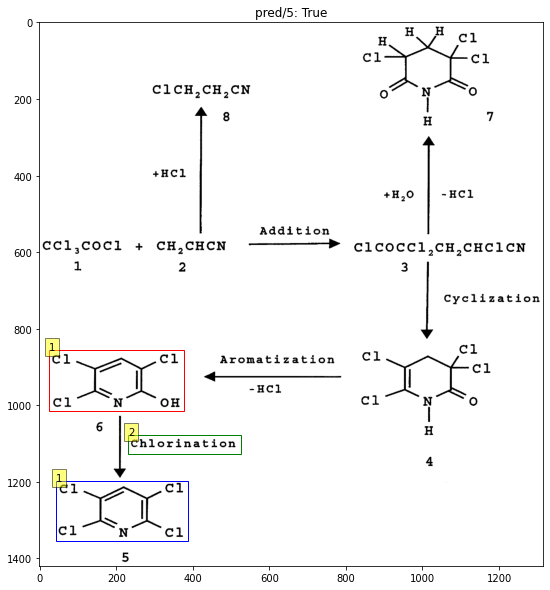

{'reactants': [{'category': '[Mol]', 'bbox': [0.018358166937719873, 0.6018009004502252, 0.28563147970746505, 0.7148574287143572], 'category_id': 1, 'smiles': 'Oc1nc(Cl)c(Cl)cc1Cl'}], 'conditions': [{'category': '[Txt]', 'bbox': [0.17548247808114584, 0.7593796898449224, 0.3990201578522054, 0.7943971985992997], 'category_id': 2}], 'products': [{'category': '[Mol]', 'bbox': [0.032396765184211536, 0.8444222111055528, 0.29427061708992147, 0.9544772386193097], 'category_id': 1, 'smiles': 'Clc1cc(Cl)c(Cl)nc1Cl'}]}


In [13]:
split = 0
data_path = data_base + f'test{split}.json'
pred_path = pred_base + f'{split}/full_test{split}.json'
with open(data_path) as f:
    data = json.load(f)
with open(pred_path) as f:
    predictions = json.load(f)

cnt = 0
for idx, image_data in enumerate(data['images']):
    path = image_base + image_data['file_name']
    img = cv2.imread(path)
    height, width, _ = img.shape
    if 'reaction' in predictions:
        reactions = predictions['reaction'][idx]
        d = ImageData(image_data, reactions)
        gold_hit, pred_hit = d.evaluate(mol_only=True, merge_condition=True)
        n = max(len(d.gold_reactions), len(d.pred_reactions))
        print(idx, image_data['id'], image_data['file_name'])
        for i, r in enumerate(d.pred_reactions):
            if len(r.reactants) + len(r.conditions) + len(r.products) == 0:
                continue
            fig, ax = plt.subplots(figsize=(10,10))
            ax.imshow(img)
            ax.set_title(f'pred/{i}: {pred_hit[i]}')
            r.draw(ax)
            plt.show()
            print(reactions[i])
    cnt += 1
    if cnt > 10:
        break